In [1]:
# 0.  사용할 패키지 불러오기 (mnist : 손글씨)
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

Using TensorFlow backend.


In [2]:
# 1. Dataset

# 훈련셋과 시험셋 불러오기
(x_train,y_train), (x_test,y_test) = mnist.load_data()

#데이터셋 전처리
x_train = x_train.reshape(60000,784).astype('float32') / 255.0
x_test = x_test.reshape(10000,784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[42000:]
x_train = x_train[:42000]
y_val = y_train[42000:]
y_train = y_train[:42000]

In [3]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=28*28, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [4]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [5]:
# 4. 모델 학습시키기
model.fit(x_train, y_train, nb_epoch=5, batch_size=32,validation_data=(x_val,y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
   32/42000 [..............................] - ETA: 1:08 - loss: 2.4476 - acc: 0.0625

/home/duckbe/virtual/ai/lib/python2.7/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


42000/42000 [==============================] - 3s 62us/step - loss: 0.7969 - acc: 0.7996 - val_loss: 0.4162 - val_acc: 0.8889
Epoch 2/5
42000/42000 [==============================] - 2s 58us/step - loss: 0.3781 - acc: 0.8962 - val_loss: 0.3350 - val_acc: 0.9064
Epoch 3/5
42000/42000 [==============================] - 2s 56us/step - loss: 0.3199 - acc: 0.9091 - val_loss: 0.2997 - val_acc: 0.9154
Epoch 4/5
42000/42000 [==============================] - 3s 60us/step - loss: 0.2883 - acc: 0.9177 - val_loss: 0.2781 - val_acc: 0.9202
Epoch 5/5
42000/42000 [==============================] - 2s 59us/step - loss: 0.2658 - acc: 0.9241 - val_loss: 0.2594 - val_acc: 0.9258


In [6]:
# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print ''
print 'loss_and_metrics' + str(loss_and_metrics)

10000/10000 [==============================] - 0s 23us/step

loss_and_metrics[0.2461380187869072, 0.9302]


In [7]:
# 6. 모델 저장하기
from keras.models import load_model
model.save('mnist_mlp_model.h5')

저장된 파일에는 다음의 정보가 담겨져 있음<br>
1. 나중에 모델을 재구성하기 위한 모델의 구성 정보
2. 모델을 구성하는 각 뉴런들의 가중치
3. 손실함수, 최적화하기 등의 학습 설정
4. 재학습을 할 수 있도록 마지막 학습상태

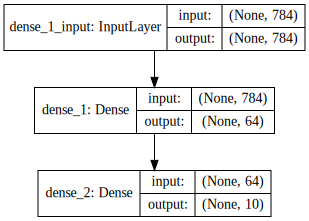

In [8]:
# 7. 모델 아키덱처 보기(mac에서는 불가능)
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

모델 아키텍처는 model.to_json()와 model.to_yaml() 함수를 이용하여 json, yaml 형식의 파일로 저장 가능<br> 
<br>
from models import model_from_json<br>
json_string = model.to_json() # 모델 아키텍처를 json 형식으로 저장<br>
model = model_from_json(json_string) # json 파일에서 모델 아키텍처 재구성<br>
<br>
from models import model_from_yaml<br>
yaml_string = model.to_yaml() # 모델 아키텍처를 yaml 형식으로 저장<br>
model = model_from_yaml(yaml_string) # yaml 파일에서 모델 아키텍처 재구성<br>
